**Problem Statement**

Imagine being able to detect blindness before it happened.

Millions of people suffer from diabetic retinopathy, the leading cause of blindness among working aged adults. Aravind Eye Hospital in India hopes to detect and prevent this disease among people living in rural areas where medical screening is difficult to conduct. Successful entries in this project will improve the hospital’s ability to identify potential patients. Further, the solutions will be spread to other Ophthalmologists through the 4th Asia Pacific Tele-Ophthalmology Society (APTOS) Symposium

Currently, Aravind technicians travel to these rural areas to capture images and then rely on highly trained doctors to review the images and provide diagnosis. Their goal is to scale their efforts through technology; to gain the ability to automatically screen images for disease and provide information on how severe the condition may be.

In this synchronous Kernels-only project, you'll build a machine learning model to speed up disease detection. You’ll work with thousands of images collected in rural areas to help identify diabetic retinopathy automatically. If successful, you will not only help to prevent lifelong blindness, but these models may be used to detect other sorts of diseases in the future, like glaucoma and macular degeneration.

**Explaination**

The problem statement revolves around diabetic retinopathy, a leading cause of blindness among working-aged adults. Diabetic retinopathy is a complication of diabetes that affects the eyes, causing damage to the blood vessels in the retina. If left untreated, it can lead to severe vision impairment and even blindness.

In rural areas where medical screening resources are limited, detecting and preventing diabetic retinopathy becomes challenging. Aravind Eye Hospital in India aims to address this issue by leveraging technology to automatically screen images for signs of the disease. Currently, technicians capture images in rural areas, and highly trained doctors review these images to provide a diagnosis. However, this process is time-consuming and requires significant manpower.

The goal of the project is to develop a machine learning model capable of automatically identifying diabetic retinopathy in fundus images. By automating the screening process, Aravind Eye Hospital aims to scale their efforts and reach more people in need of early detection and treatment. The successful implementation of such a model not only helps in preventing lifelong blindness but also sets a precedent for using technology to detect other eye diseases like glaucoma and macular degeneration.

In summary, the problem statement involves:

1. Developing a machine learning model to automatically detect diabetic retinopathy in fundus images.
2. Improving the efficiency of screening processes in rural areas where medical resources are limited.
3. Scaling efforts to reach more people and provide early detection and treatment of diabetic retinopathy.
4. Potentially extending the model to detect other eye diseases, thus contributing to broader public health initiatives.

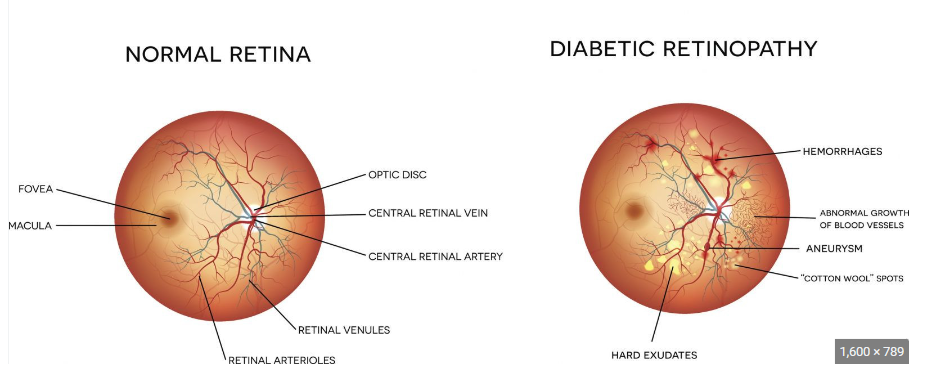

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR



In [ ]:
#setting Kaggle API with colab
from google.colab import drive
import os

drive.mount('/content/drive')


os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write the API command from kaggle to download the dataset.
! kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:44<00:00, 74.4MB/s]
100% 9.51G/9.51G [01:44<00:00, 97.8MB/s]


In [ ]:
# linux command to unzip the .zip folder and then remove the .zip folder
! unzip '*.zip' && rm -f '*.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/5400549bfe76.png  
  inflating: test_images/

**DATA PREP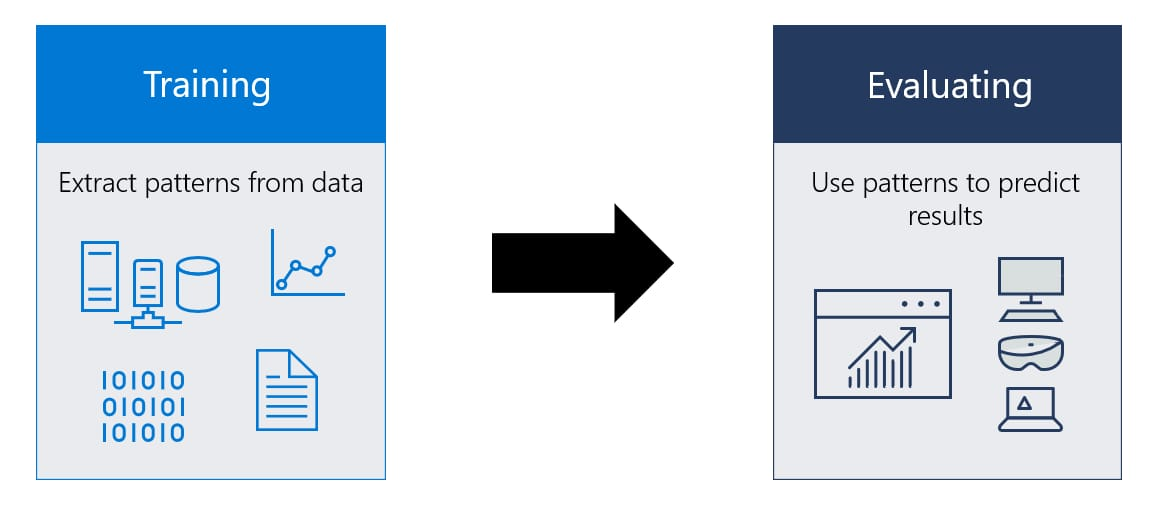ROCESSING**

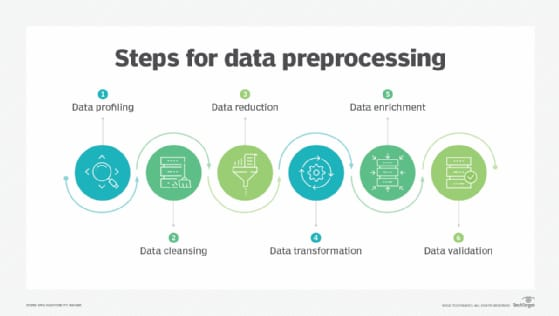

**IMPORT LIBRARIES**

To detect diabetic retinopathy and prevent blindness, we typically use a combination of machine learning and image processing libraries in Python.

OpenCV (Open Source Computer Vision Library): Used for image processing tasks such as image loading, manipulation, and feature extraction.

TensorFlow or PyTorch: Deep learning frameworks that provide tools for building and training neural networks, including convolutional neural networks (CNNs) commonly used in image classification tasks.

scikit-learn: A machine learning library that provides tools for data preprocessing, model selection, evaluation, and more.

PIL (Python Imaging Library) or its fork Pillow: Useful for handling image files and basic image processing tasks.



Additionally,  also need other utility libraries for data manipulation, visualization, and mightother tasks,that include libraries such as NumPy, matplotlib, pandas, etc.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

**Reading the Dataset**
:Read a dataset in Python, typically use libraries like pandas for tabular data or numpy for numerical data.

In [ ]:
data=pd.read_csv('/content/train.csv')
data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


**Error Handling**:

Exception handling is used to catch any errors that may occur during image processing. If an error occurs, an error message is printed, and processing continues with the next image.



In [ ]:
import cv2
import numpy as np

immatrix = []
img_pt = '/content/test_images/'
train_pd = pd.read_csv("/content/train.csv")


for i in range(1, 90):
    if i < 10:
        img_pt += "00" + str(i) + ".png"
    else:
        img_pt += "0" + str(i) + ".png"

    try:
        img = cv2.imread(img_pt)
        if img is None:
            print(f"Error: Unable to read image '{img_pt}'")
            continue

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        equ = cv2.equalizeHist(img_gray)
        flattened_equ = np.array(equ).flatten()
        immatrix.append(flattened_equ)
        print(f"Processed image '{img_pt}': Shape = {flattened_equ.shape}")
    except Exception as e:
        print(f"Error processing image '{img_pt}': {e}")

# Now you have a list 'immatrix' containing flattened, histogram-equalized grayscale images.


Error: Unable to read image '/content/test_images/001.png'
Error: Unable to read image '/content/test_images/001.png002.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png007.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png007.png008.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png007.png008.png009.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png007.png008.png009.png010.png'
Error: Unable to read image '/content/test_images/001.png002.png003.png004.png005.png006.png007

***Training Dataset***:

The training dataset is used to train the machine learning model. It consists of a set of input features (X) and corresponding target labels (y).
The model learns patterns and relationships between the input features and target labels from the training dataset.
The training dataset should ideally represent the full range of variation present in the real-world data that the model will encounter.


**Setting Seed for Reproducibility**:

In the context of random number generation, a "seed" is a starting point used to initialize a ***pseudorandom number generator (PRNG)***. Pseudorandom number generators are algorithms that produce sequences of numbers that appear random but are actually deterministic—they are completely determined by the initial seed value.



In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
SEED = 42
x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

***Test Dataset***:

The test dataset is used to evaluate the performance of the trained machine learning model.
It consists of a separate set of input features (X_test) and corresponding target labels (y_test) that the model has not seen during training.
The test dataset serves as an independent measure of the model's generalization ability, i.e., how well it performs on unseen data.
Evaluating the model on the test dataset helps assess its performance in real-world scenarios and provides insights into its ability to make accurate predictions on new, unseen data.


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
SEED = 42
x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

In [ ]:
print(df_train.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


Prints the shapes of the training and validation subsets to the console.
1.  train_x.shape: Represents the shape (dimensions) of the training features.
2. train_y.shape: Represents the shape of the training labels.
3. valid_x.shape: Represents the shape of the validation features.
4. valid_y.shape: Represents the shape of the validation labels.


This code snippet efficiently splits the dataset into training and validation subsets, ensures reproducibility through the use of a fixed random seed, assigns variables to store the resulting subsets, prints their shapes for verification, and visualizes the distribution of classes in each subset. These steps are crucial for proper data preparation and validation in machine learning tasks.








(3112,) (3112,) (550,) (550,)


<Axes: >

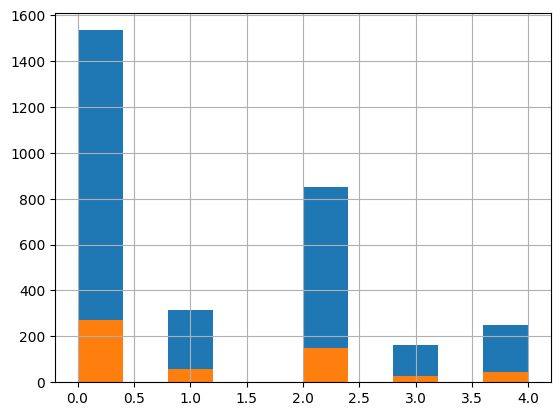

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

In above bar plot it is clearly visible that the dataset is not uniformly distributed, instead it is more biased with the class 0.

**Data augmentation**
Data augmentation techniques are commonly employed to address imbalanced datasets by artificially increasing the size of minority classes or rebalancing the overall class distribution. Here are some relevant data augmentation techniques that can be applied to balance the dataset:



**SMOTE (Synthetic Minority Over-sampling Technique)**:




*  SMOTE is a popular technique used to generate synthetic samples for the minority class(es) by interpolating between existing minority class instances.
*It creates new synthetic samples by selecting two or more similar instances and generating new instances along the line segments connecting them in the feature space.
*SMOTE helps in balancing the dataset by increasing the representation of minority classes without directly duplicating existing samples.


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(image_folder, train_csv_path):
    """
    Balances the dataset using SMOTE (Synthetic Minority Over-sampling Technique).

    Parameters:
    image_folder (str): Path to the folder containing the images.
    train_csv_path (str): Path to the CSV file containing filenames and labels.

    Returns:
    filenames (list): List of filenames.
    balanced_labels (list): List of balanced labels.
    """

    # Read the CSV file
    df = pd.read_csv(train_csv_path)

    # Get the filenames and labels
    filenames = df['id_code'].tolist()
    labels = df['diagnosis'].astype(str).tolist()  # Convert integer labels to strings

    # Encode the labels into numeric representations
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    # Create the full path to the images
    image_paths = [os.path.join(image_folder, filename + ".png") for filename in filenames]  # Adjust file extension if needed

    # Perform SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(encoded_labels.reshape(-1, 1), encoded_labels)

    # Decode the labels back to their original values
    decoded_labels = label_encoder.inverse_transform(y_balanced)
    return filenames, decoded_labels

Visual inspection of sample images is a crucial step in understanding the characteristics and quality of a dataset, especially in image-based machine learning tasks. By examining sample images, researchers and practitioners can gain insights into various aspects of the dataset, such as image resolution, color distribution, class diversity, and the presence of artifacts or anomalies.

The provided Python code snippet facilitates this process by loading and displaying a specified number of sample images from the dataset. Here's how the function works:

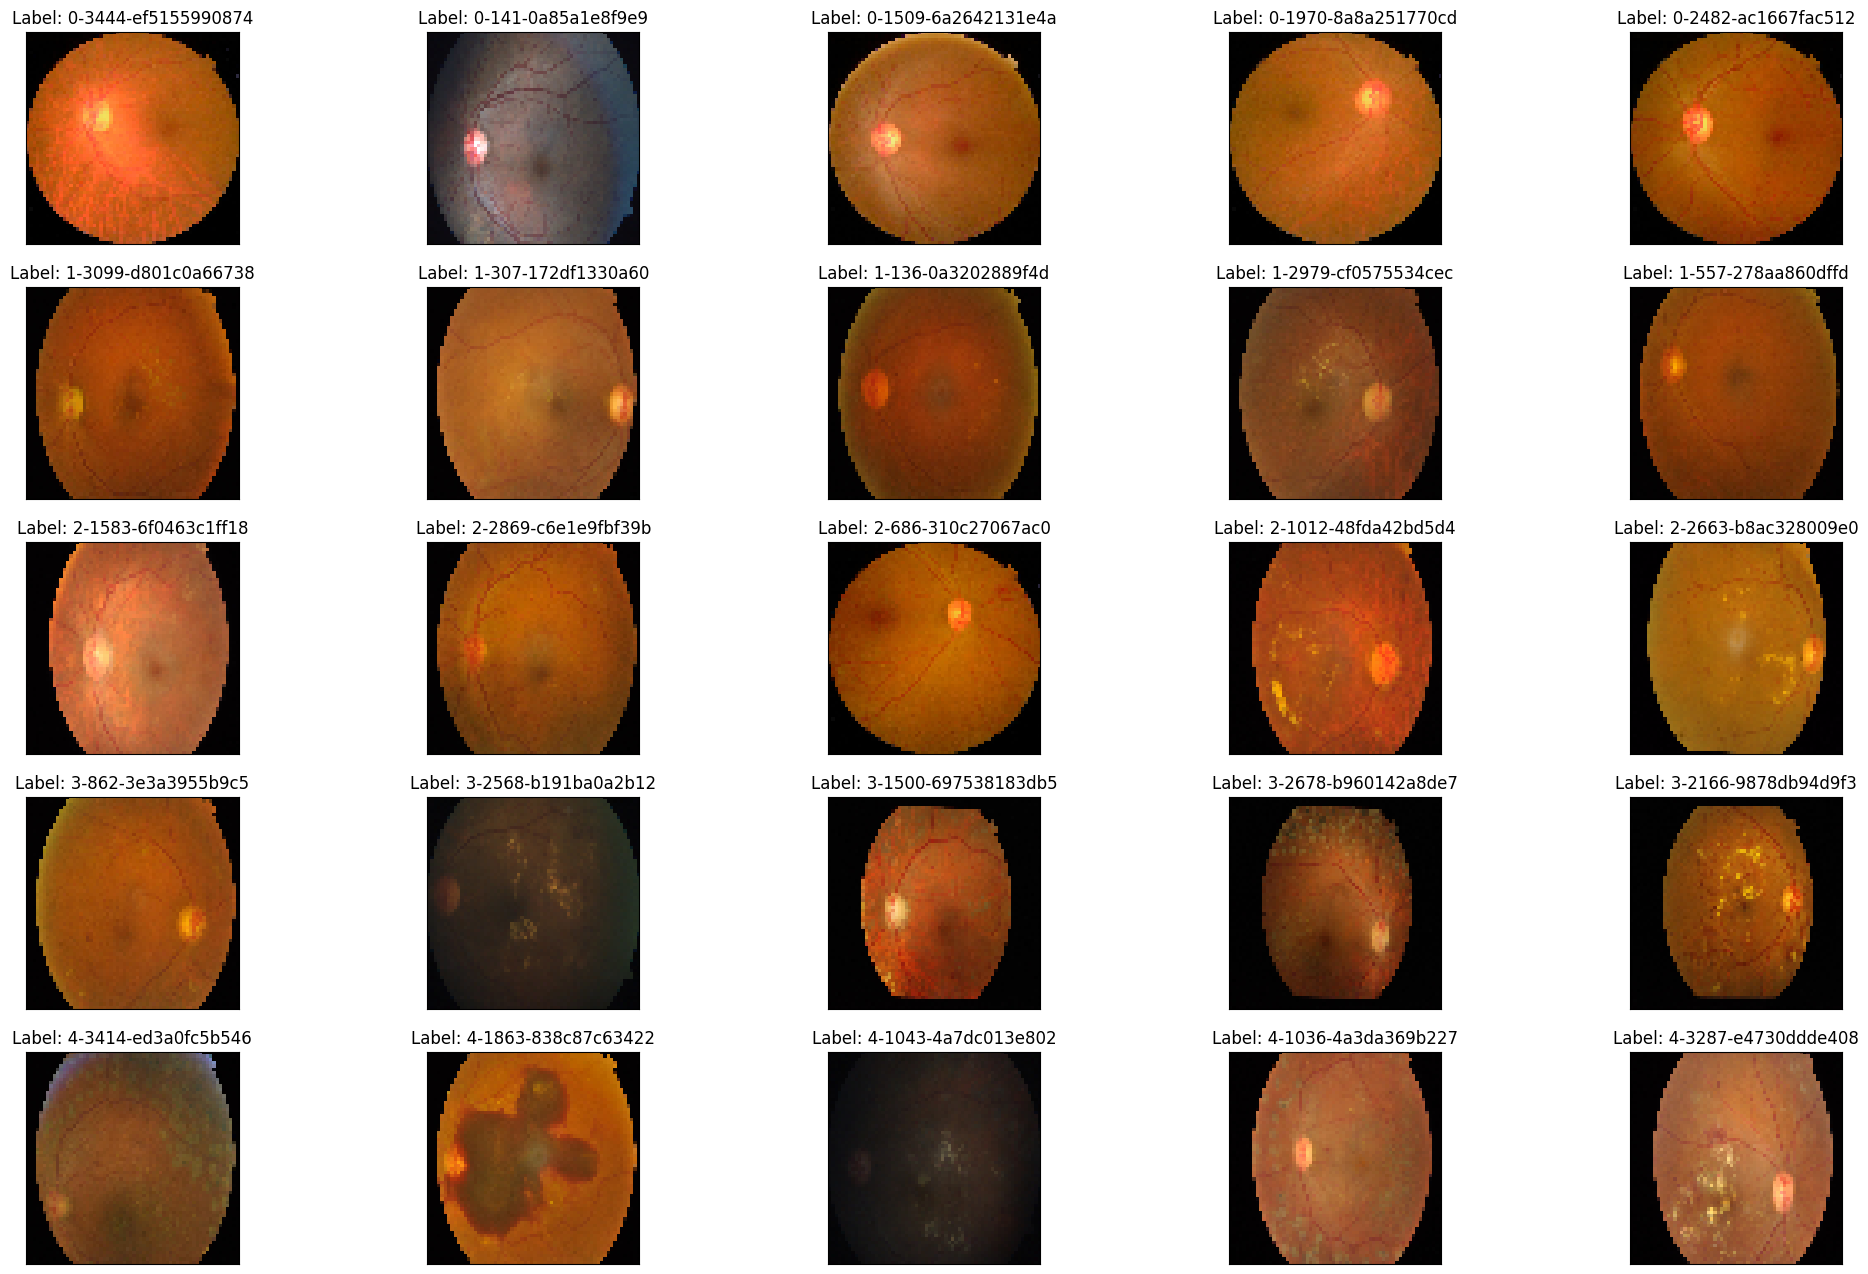

In [ ]:
IMG_SIZE = 64
fig = plt.figure(figsize=(25, 16))
# display 5 images from each class
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"/content/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']))

To address the challenge of distinguishing anomalies or different classes in a colored image where the differences are not clearly visible, several image processing techniques and filters can be applied to enhance the features and make the distinctions more apparent. Below are some strategies that could be employed:



**GRAYSCALE IMAGE:**Converting the image to grayscale can sometimes help in reducing the complexity by removing color information, allowing for easier identification of intensity differences and patterns.



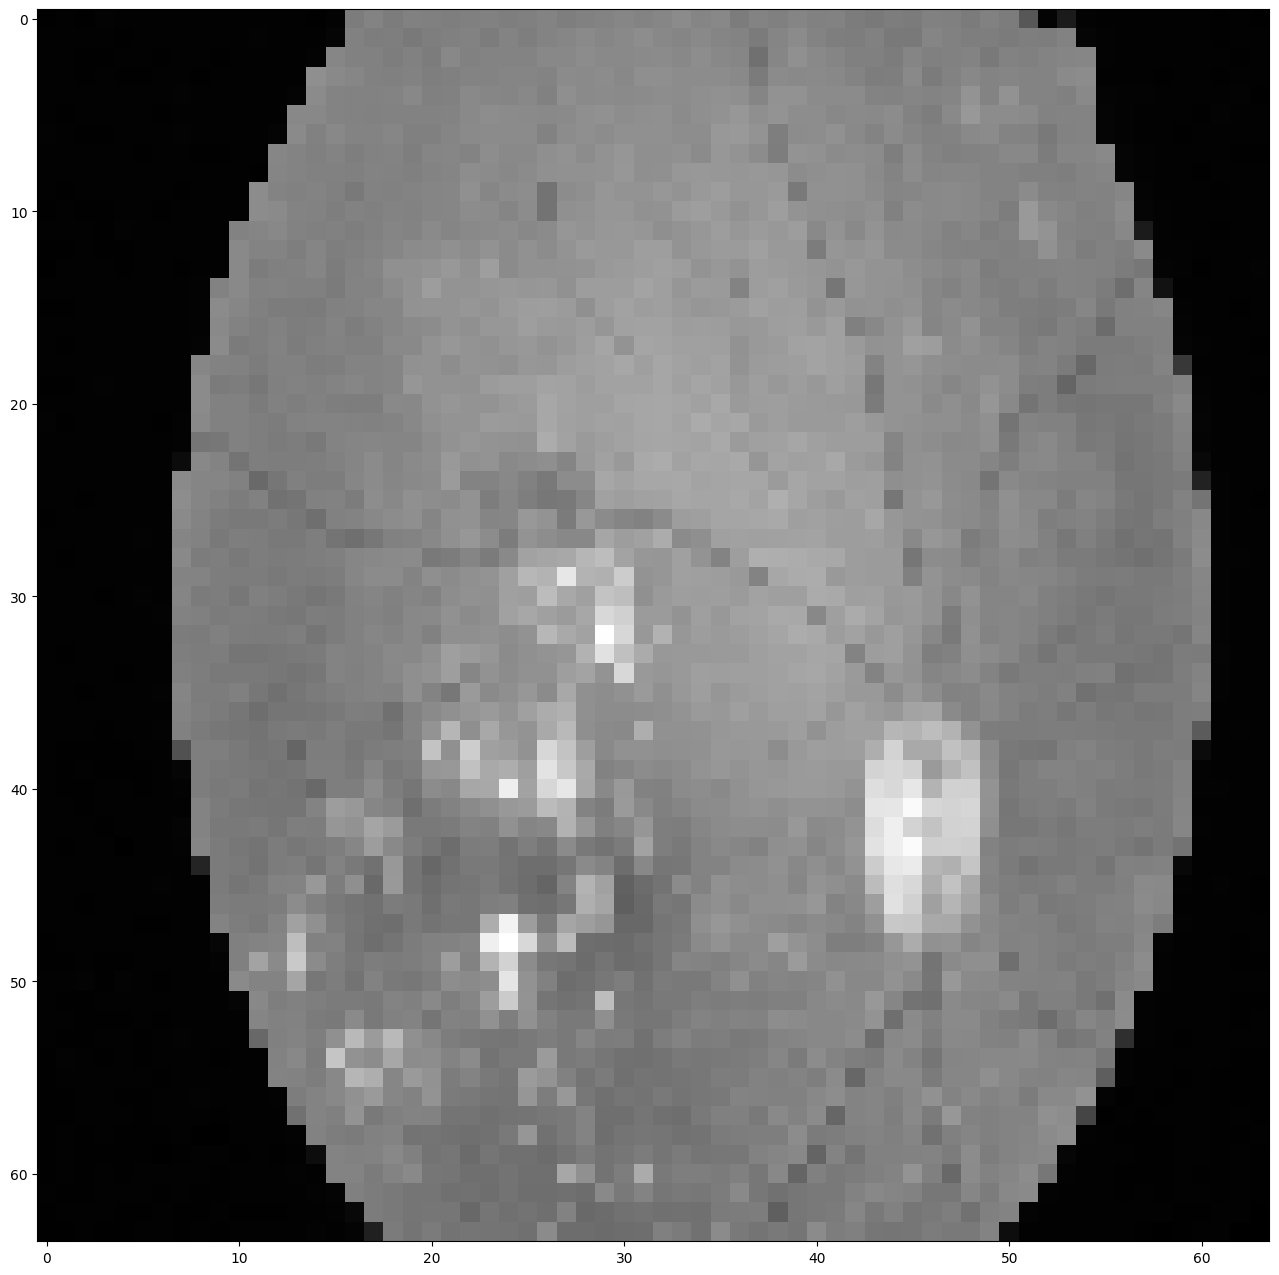

In [ ]:
Fig = plt.figure(figsize=(30, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"/content/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']))

The observation that anomalies can be detected better in the grayscale version of the samples compared to the RGB or original image is a common finding in various image processing tasks. Grayscale conversion simplifies the image by eliminating color information, which reduces the data complexity and focuses on the intensity of the pixels. This simplification can help in several ways to enhance anomaly detection:



1. ***Enhanced Contrast***
Grayscale images allow for a more straightforward contrast adjustment, making it easier to distinguish subtle differences in brightness or intensity that may indicate anomalies.
2. ***Reduced Noise***
Color images can have noise distributed across different color channels. Converting to grayscale merges these channels, which can sometimes reduce the appearance of noise, making the relevant features more pronounced.
3. ***Simplified Processing***
Processing grayscale images is computationally less intensive than processing full-color images. This simplicity enables faster analysis and application of more complex algorithms or filters that might not be as feasible to apply to RGB images due to higher computational costs.
4.*** Focus on Texture and Shape***
Grayscale conversion helps in emphasizing the texture and shape information. Many times, the anomalies or features of interest are defined more by their texture and shape rather than their color, making grayscale images more suitable for detecting these anomalies.


2136 3216


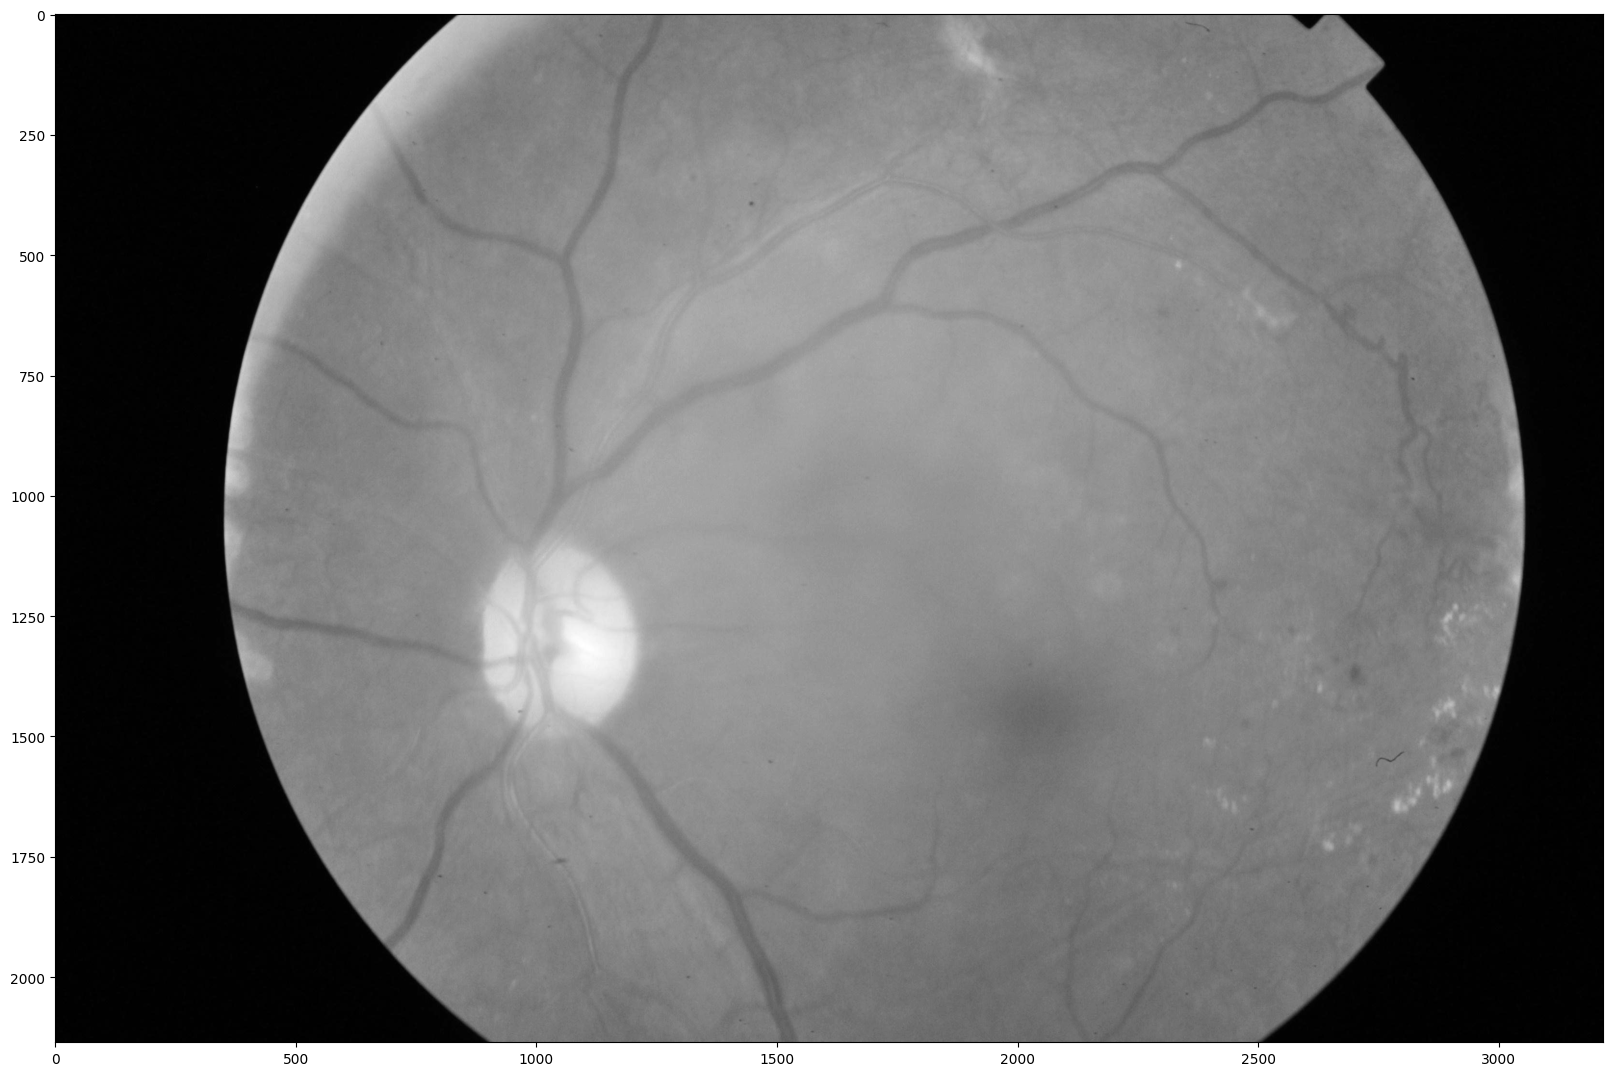

In [ ]:
dpi = 80 #inch

path=f"../content/train_images/cd54d022e37d.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = image.shape
print(height, width)

SCALE=2
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

**Applying filters:**Applying filters to extract features from images is a foundational step in many image processing and computer vision tasks. These filters can highlight or isolate specific aspects of an image, such as edges, textures, or patterns, making it easier to analyze or classify the image. Here's an overview of some commonly used filters and techniques for feature extraction:

1. ***Edge Detection Filters***

Sobel Filter: Emphasizes edges in the direction of the largest intensity
gradient. It's applied in both horizontal and vertical directions to get a full edge map.

Canny Edge Detecto: A multi-stage algorithm that detects a wide range of edges in images. It's more complex than Sobel and includes steps for noise reduction, gradient calculation, non-maximum suppression, and edge tracking by hysteresis.
Laplacian of Gaussian (LoG): Combines Gaussian blur to reduce noise with the Laplacian filter to detect edges. It's useful for highlighting regions of rapid intensity change.
2. ***Texture Filters***

Gabor Filters: Used for texture analysis, they can capture the amount and orientation of edges in localized regions of the image. They're particularly useful for distinguishing textured patterns.

Local Binary Patterns (LBP): Describes the local texture around a pixel by comparing each pixel with its surrounding neighbors and encoding this information into a binary number, which is effective for texture classification.




**Implementing Filters for Feature Extraction**:When applying these filters, the choice and configuration depend heavily on the specific task and the nature of the images. Here's a general approach to implementing filters for feature extraction:



1.   ***Preprocessing***: This might include converting to grayscale (if not already), normalizing pixel values, and perhaps applying a mild Gaussian blur to reduce noise.
2.  ***Filter Application***: Apply one or more of the filters mentioned above, depending on whether you're interested in edges, textures, or other features. This might require experimenting with different filters and parameters.

3.   ***Post-processing***: After applying filters, further processing like thresholding or morphological operations might be necessary to isolate or highlight the features of interest.
Feature Extraction: Use the processed image to extract meaningful features, which could be as simple as the raw pixel values from a region of interest, or more complex descriptors obtained through methods like LBP, HOG, or even through deep learning models like Convolutional Neural Networks (CNNs).





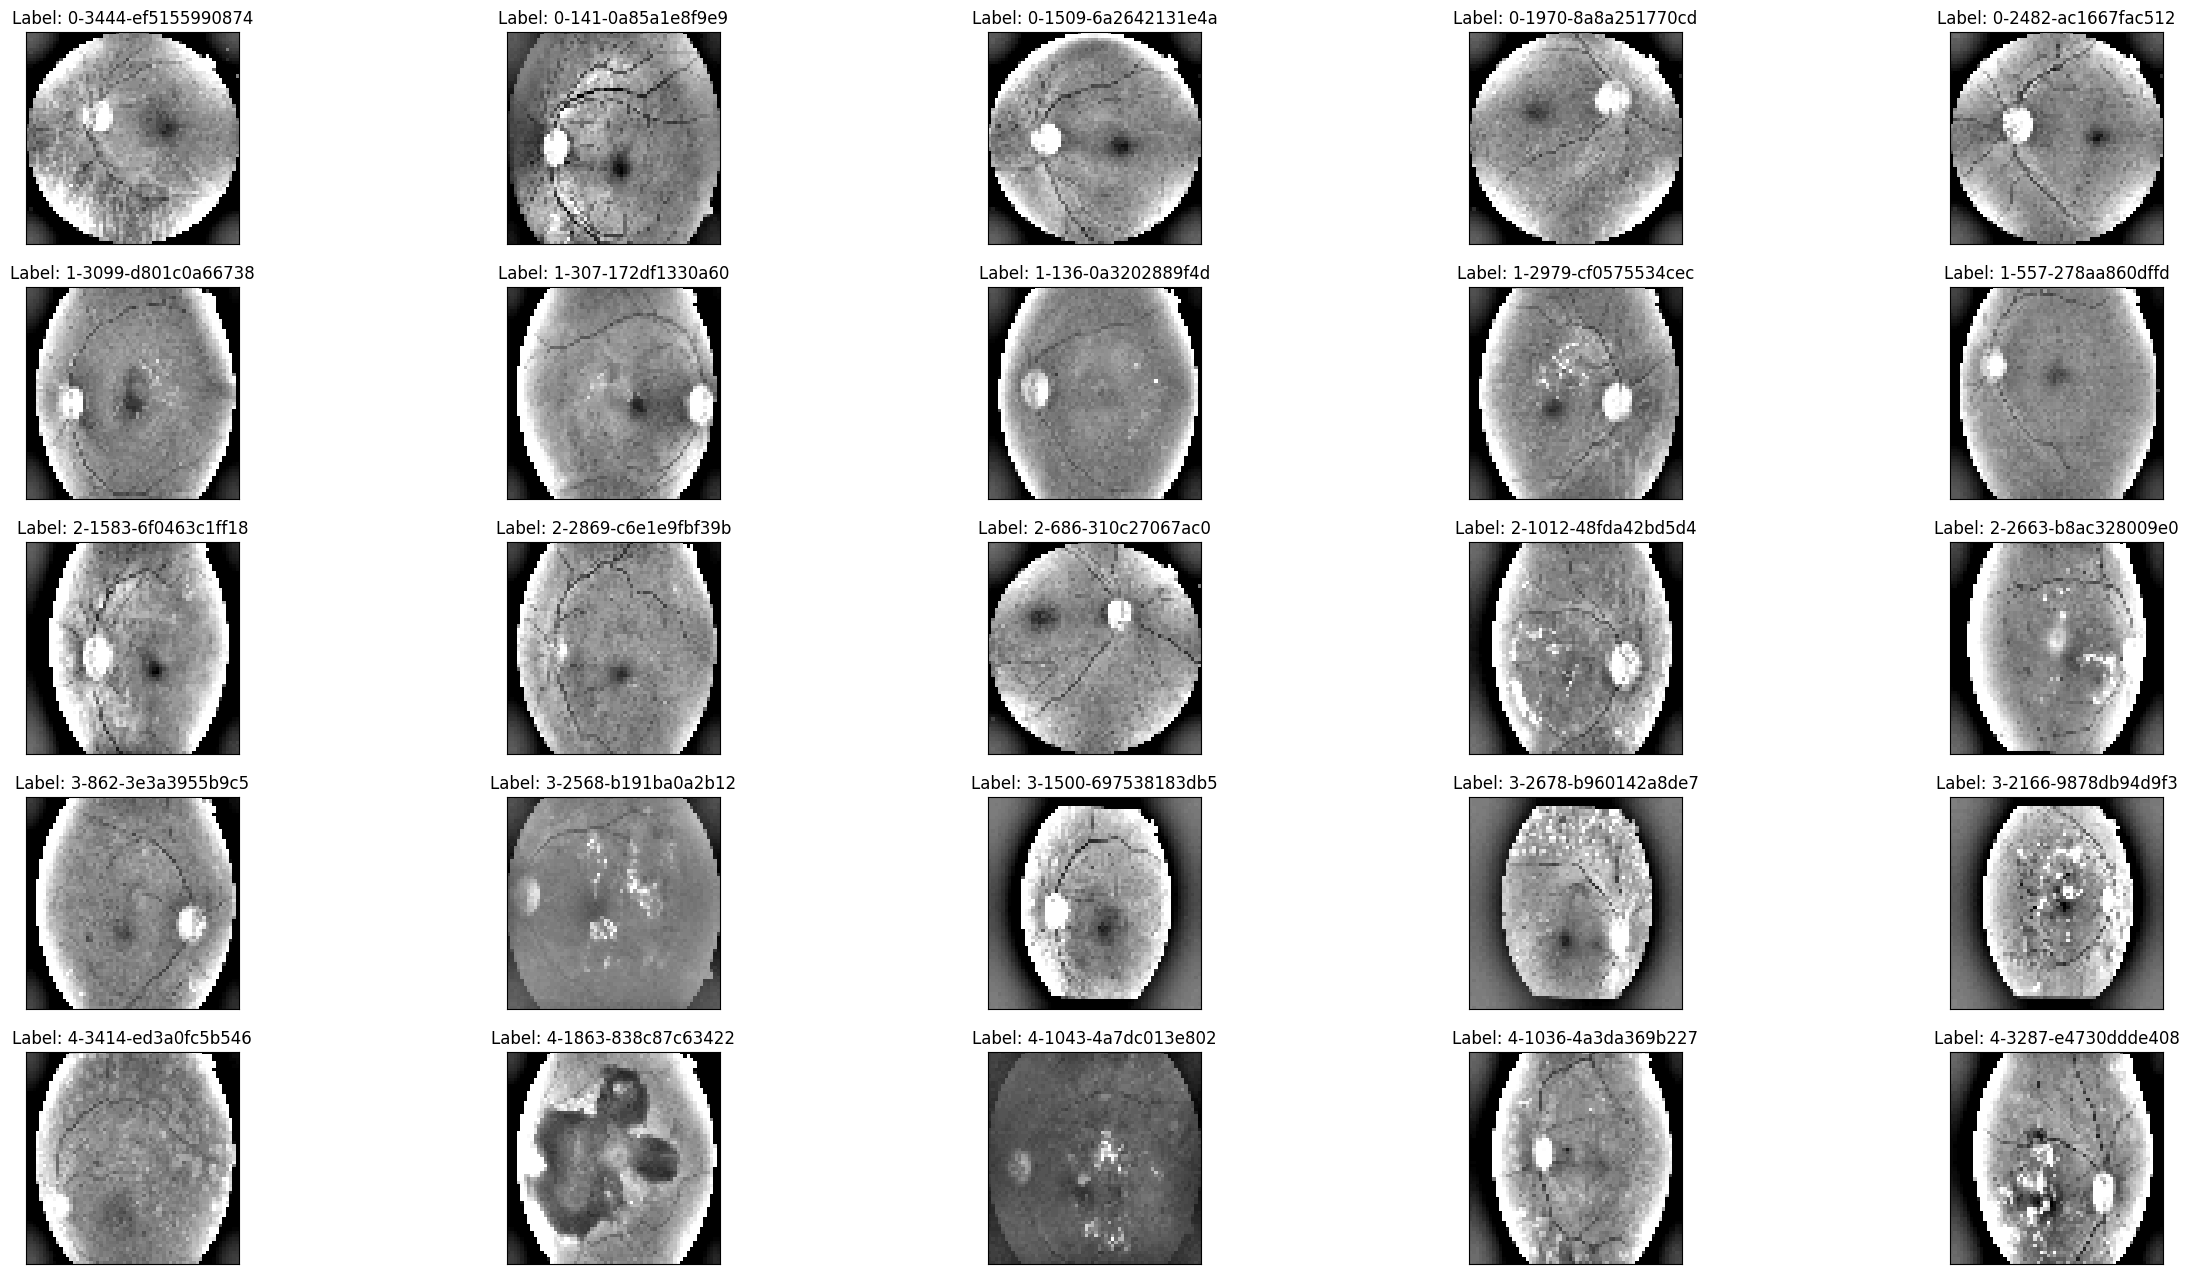

In [ ]:
fig = plt.figure(figsize=(30, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"/content/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # the trick is to add this line,
        # adding this above line uses, gaussian blur and apply the filter on the original image  which makes the boundary clearly visible, thus enhancing the edges of the grayscale image

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']))

**MODELLING**

***Model Selection**

For the task of automatically detecting diabetic retinopathy in fundus images, a convolutional neural network (CNN) is a suitable choice due to its ability to extract features from images effectively. Here's how you can build a basic CNN model using TensorFlow and Keras




Initialize the optimizer and loss function. We will be using stochastic gradient descent (SGD) with a learning rate of 0.01 which will be decaying every epoch. In practice SGD is 2 dimensional function but the neural network might have millions of parameters which means the millions of directions the loss function can move. If the loss function has a local minimum point/saddle point, there will be “zero gradient” and the gradient descent will get stuck. If we add momentum to SGD, the saddle points will get velocity to move forward. Adding nesterov momentum will take shorter path towards convergence.



In [ ]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you already have train_images and train.csv
# Load your data
train_df = pd.read_csv('train.csv')


# Define constants
IMG_SIZE = 224
SEED = 42

# Apply filter to images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), IMG_SIZE/10), -4, 128)
    return np.expand_dims(image, axis=-1)  # Add channel dimension

# Preprocess images and labels
X = np.array([preprocess_image(f"/content/train_images/{image_id}.png") for image_id in train_df['id_code']])
y = train_df['diagnosis']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for diabetic retinopathy severity levels
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
92/92 [==============================] - 8s 52ms/step - loss: 1.4413 - accuracy: 0.6320 - val_loss: 0.8199 - val_accuracy: 0.6999
Epoch 2/10
92/92 [==============================] - 4s 46ms/step - loss: 0.8022 - accuracy: 0.6999 - val_loss: 0.8221 - val_accuracy: 0.7190
Epoch 3/10
92/92 [==============================] - 4s 46ms/step - loss: 0.7716 - accuracy: 0.7194 - val_loss: 0.7765 - val_accuracy: 0.7312
Epoch 4/10
92/92 [==============================] - 5s 49ms/step - loss: 0.7290 - accuracy: 0.7364 - val_loss: 0.7569 - val_accuracy: 0.7462
Epoch 5/10
92/92 [==============================] - 4s 47ms/step - loss: 0.7260 - accuracy: 0.7381 - val_loss: 0.7486 - val_accuracy: 0.7435
Epoch 6/10
92/92 [==============================] - 4s 47ms/step - loss: 0.7027 - accuracy: 0.7521 - val_loss: 0.7333 - val_accuracy: 0.7435
Epoch 7/10
92/92 [==============================] - 4s 48ms/step - loss: 0.6769 - accuracy: 0.7573 - val_loss: 0.7247 - val_accuracy: 0.7490
Epoch 8/10
92

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Add a channel dimension to the data (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define the CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0 to 9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.0465 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0321 - accuracy: 0.9904
Test Accuracy: 0.9904000163078308


save the trained model

In [ ]:
# Save the trained model
model.save('mnist_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Importing the saved trained model to find the diabetic retinopathy

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('mnist_cnn_model.h5')  # Replace 'mnist_cnn_model.h5' with the path to your saved model

# Function to load and prepare the image
def load_and_prepare_image(img_path):
    try:
        # Load the image with the correct target size and color mode
        img = image.load_img(img_path, target_size=(256, 256), color_mode='rgb')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
        img_array /= 255.0  # Normalize to [0,1] if your model was trained on normalized images
        return img_array
    except Exception as e:
        print("Error loading image:", e)
        return None

# Specify the path to your image
img_path = '/content/input.jpeg'  # Replace this with the actual path to your image

# Load and prepare the image
img_array = load_and_prepare_image(img_path)
if img_array is not None:
    # Get the prediction probabilities from the model
    prediction = model.predict(img_array)
    # Assuming your model outputs a binary classification (0: No Diabetic Retinopathy, 1: Diabetic Retinopathy)
    # You can adjust the interpretation based on your model's output
    if prediction[0][0] > 0.5:
        print("The image is predicted to contain Diabetic Retinopathy.")
    else:
        print("The image is predicted not to contain Diabetic Retinopathy.")
else:
    print("Image loading failed.")


1/1 [==============================] - 1s 1s/step
The image is predicted not to contain Diabetic Retinopathy.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from numpy import array
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



Lets define the model. This model consist of 2 dimensional convolution layers with Relu as activation function, zero padding layers and max pooling layers. We will be also implementing batch normalization and L2 regularization. This is a Keras functional API implementation.



This code is used to define a convolutional neural network (CNN) model architecture using the Keras functional API. Let's break down the code step by step:

1. **Input Layer**:
   - `visible = Input(shape=(256,256,3))`: This line defines the input layer with a shape of (256, 256, 3), which means the input images are expected to have a height and width of 256 pixels and three color channels (RGB).

2. **Convolutional Layers**:
   - `conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)`: This line creates a convolutional layer with 16 filters, each with a kernel size of (3,3), ReLU activation function, and stride of (1,1). It operates on the input `visible`.
   - `conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)`: Another convolutional layer with similar configuration is added, operating on the output of the previous layer.

3. **Batch Normalization**:
   - `bat1 = BatchNormalization()(conv2)`: Batch normalization is applied to the output of the second convolutional layer (`conv2`).

4. **Zero Padding**:
   - `zero1 = ZeroPadding2D(padding=(1, 1))(bat1)`: Zero padding is applied to the output of the batch normalization layer to maintain spatial dimensions.

5. **Additional Convolutional Layers**:
   - Similar blocks of convolutional layers, batch normalization, and zero padding are repeated to extract features from the input image.

6. **Pooling Layers**:
   - `pool1 = MaxPooling2D(pool_size=(2, 2))(bat3)`: Max pooling layers are added to downsample the spatial dimensions of the feature maps.

7. **Dense Layers**:
   - `hidden1 = Dense(32, activation='relu')(flat)`: Dense layers with ReLU activation are added to perform classification based on the extracted features.

8. **Dropout Layers**:
   - `drop1 = Dropout(0.3)(hidden1)`: Dropout layers are added to prevent overfitting by randomly dropping a fraction of the units during training.

9. **Output Layer**:
   - `output = Dense(5, activation='sigmoid')(drop2)`: The output layer consists of five units with a sigmoid activation function, which is suitable for multi-label classification problems.

10. **Model Compilation**:
   - Finally, the `Model` is defined with the input `visible` and the output `output`.

This code snippet defines the architecture of a CNN model for some classification task, likely involving images with the dimensions 256x256x3 (height, width, channels).

**Model Architecture**

In [ ]:
from keras.layers import Input
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ZeroPadding2D
from keras.models import Model
visible = Input(shape=(256,256,3))
conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
bat1 = BatchNormalization()(conv2)
zero1 = ZeroPadding2D(padding=(1, 1))(bat1)

conv3 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(zero1)
conv4 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(conv3)
bat2 = BatchNormalization()(conv4)

conv5 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(bat2)
conv6 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv5)
bat3 = BatchNormalization()(conv6)
pool1 = MaxPooling2D(pool_size=(2, 2))(bat3)
zero2 = ZeroPadding2D(padding=(1, 1))(pool1)

conv7 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(zero2)
conv8 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv7)
bat4 = BatchNormalization()(conv8)

conv9 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(bat4)
conv10 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv9)
bat5 = BatchNormalization()(conv10)

conv11 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(bat5)
conv12 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv11)
bat6 = BatchNormalization()(conv12)
pool2 = MaxPooling2D(pool_size=(2, 2))(bat6)

conv13 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(pool2)
conv14 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv13)
bat7 = BatchNormalization()(conv14)

conv15 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(bat7)
conv16 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv15)
bat8 = BatchNormalization()(conv16)

flat = Flatten()(bat8)
hidden1 = Dense(32, activation='relu')(flat)
drop1 = Dropout(0.3)(hidden1)

hidden2 = Dense(32, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)

output = Dense(5, activation='sigmoid')(drop2)
model = Model(inputs=visible, outputs=output)


In [ ]:
# Use the legacy optimizer
opt = tf.keras.optimizers.legacy.SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks=[EarlyStopping(patience=3, restore_best_weights=True),
           ReduceLROnPlateau(patience=2),
           ModelCheckpoint(filepath='diabetic_retinopathy_model.keras', save_best_only=True)]

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 252, 252, 16)      64        
 chNormalization)                                                
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 254, 254, 16)      0         
 ing2D)                                                          
                                                                 
 conv2d_10 (Conv2D)          (None, 252, 252, 32)      4640  

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                 
Total params: 10853045 (41.40 MB)
Trainable params: 10851925 (41.40 MB)
Non-trainable params: 1120 (4.38 KB)
_________________________________________________________________


In [ ]:
train_dir = '/content/test_images'
valid_dir = '/content/train_images'


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Define directory paths for training and validation data
train_dir = '/content/test_images'
valid_dir = '/content/train_images'

# Create data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(256, 256), batch_size=32, class_mode='binary')


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
callbacks = [EarlyStopping(patience=3, restore_best_weights=True),
             ReduceLROnPlateau(patience=2),
             ModelCheckpoint(filepath='diabetic_retinopathy_model.keras', save_best_only=True)]


In [ ]:
# Save the model
model.save("diabetic_retinopathy_model.keras")

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Correct Conv2d (not Conv2D)
        self.conv_layer = nn.Sequential(
            nn.Conv2d(32, 3, 1, padding=1),  # Corrected to Conv2d
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 3, 1, padding=1),  # Corrected to Conv2d
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * (image_height//4) * (image_width//4), 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# You need to define image_height, image_width, and num_classes based on your specific application
image_height = 64  # Example value
image_width = 64   # Example value
num_classes = 10   # Example value for a dataset with 10 different classes

# Initialize model and optimizer
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Assuming model has been trained already

# Save the model state dictionary
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'diabetic_retinopathy_model.keras')


In [ ]:
# Assuming the same architecture
model = CNN()
optimizer = torch.optim.Adam(model.parameters())

checkpoint = torch.load('diabetic_retinopathy_model.keras')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# If you plan to train further
model.train()
# Or, if you plan to evaluate
model.eval()


CNN(
  (conv_layer): Sequential(
    (0): Conv2d(32, 3, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

Quadratic Weighted Kappa (QWK), also known as the Cohen's Kappa Score, between two sets of data. This metric is particularly used to measure agreement between two raters (or in machine learning, between the predicted and actual values) on a categorical scale. However, unlike simple agreement measures, QWK takes into account the agreement occurring by chance. The 'quadratic' weighting penalizes disagreements more if they are further apart on the scale, making it especially useful for ordinal data where the order of categories is meaningful.

The value of kappa can be interpreted as follows:

0.81 to 1.00: Almost perfect agreement

0.61 to 0.80: Substantial agreement

0.41 to 0.60: Moderate agreement

0.21 to 0.40: Fair agreement

0.01 to 0.20: Slight agreement

Less than 0.01: Poor agreement
  


In [ ]:
from sklearn.metrics import cohen_kappa_score

def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

y_pred_probabilities = model.predict(X_val)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_pred_probabilities, axis=1)
kappa_score = quadratic_weighted_kappa(y_val, y_pred)

print("Quadratic weighted kappa:", kappa_score)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The provided code snippet first separates the features and labels from the dataset, with features stored in `X` and labels in `y`. It then applies SMOTE, a technique for addressing class imbalance, to create synthetic samples for minority classes, effectively balancing the dataset. The sizes of the original and resampled datasets are compared, highlighting the impact of SMOTE on dataset size. This process ensures a more representative training set for machine learning models, enhancing their ability to generalize and make accurate predictions across all classes.

In [ ]:
len(train_df)

#SMOTE

3662

**Exploratory Data Analysis (EDA)**is a crucial initial step in any data analysis.

  It involves examining and visualizing the dataset to gain insights into its structure, relationships between variables, patterns, and potential issues.

**Univariate Analysis**:

* Univariate analysis involves examining individual variables in isolation, without considering their relationships with other variables.
* In the provided code snippet, univariate analysis is performed through tasks such as computing summary statistics for numeric columns and visualizing the distribution of the 'id_code' column using a histogram.
* Univariate analysis helps in understanding the distribution, central tendency, and variability of individual variables

First few rows of the dataset:
        id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4

Dimensions of the dataset:
(1928, 1)

Summary statistics for numeric columns:
             id_code
count           1928
unique          1928
top     0005cfc8afb6
freq               1

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_code  1928 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB
None


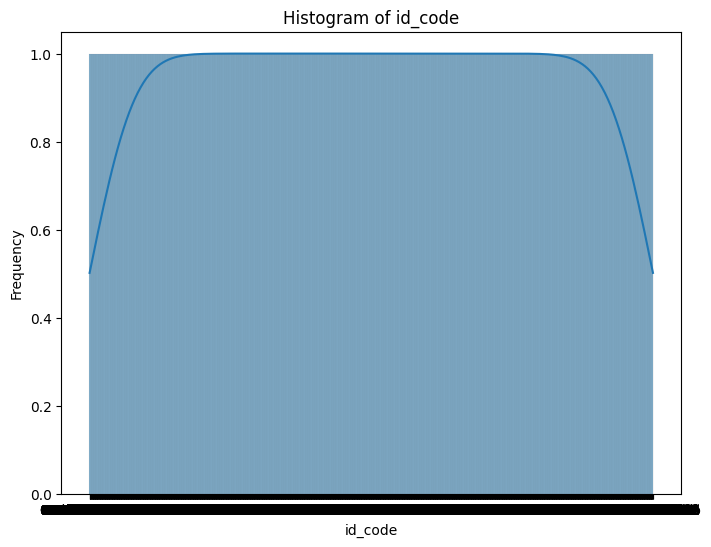

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/test.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the dimensions of the dataset
print("\nDimensions of the dataset:")
print(df.shape)

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Summary of data types and missing values
print("\nData types and missing values:")
print(df.info())

# Data visualization
# Histogram of the 'id_code' column
plt.figure(figsize=(8, 6))
sns.histplot(df['id_code'], bins=20, kde=True)
plt.title('Histogram of id_code')
plt.xlabel('id_code')
plt.ylabel('Frequency')
plt.show()


**Acessing the model**

To access the model after training,  the model variable which holds the trained model object

In [ ]:
# Access the trained model
trained_model = model


Now, trained_model holds the trained model object, and can use it for various purposes such as making predictions on new data, evaluating its performance, or saving it for future use.


In [ ]:
import numpy as np

def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(rater_a, rater_b, min_rating=0, max_rating=4):

    rater_a = np.clip(rater_a, min_rating, max_rating)
    rater_b = np.clip(rater_b, min_rating, max_rating)

    rater_a = np.round(rater_a).astype(int).ravel()
    rater_a[~np.isfinite(rater_a)] = 0
    rater_b = np.round(rater_b).astype(int).ravel()
    rater_b[~np.isfinite(rater_b)] = 0

    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return 1.0 - numerator / denominator

**kK NEAREST NEIGHBOUR ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=2018)

knn = KNN(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Overall, this code demonstrates how to use the KNN algorithm for classification tasks using scikit-learn, from loading the dataset to training the classifier and evaluating its performance.







Pickle is a module in Python that allows objects to be serialized and deserialized. Serialization is the process of converting objects into a byte stream, which can then be stored in a file, transmitted over a network, or saved in a database. Deserialization is the reverse process, where the byte stream is converted back into objects.

Pickle is commonly used for:

Saving and loading trained machine learning models.
Saving and loading complex data structures.
Transmitting Python objects between processes or over a network.


In [ ]:
import pickle


# Save the trained model as a pickle string.

saved_model = pickle.dumps(knn)


# Load the pickled model

knn_from_pickle = pickle.loads(saved_model)


# Use the loaded pickled model to make predictions
knn_from_pickle.predict(X_test)

array([0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2,
       1])

In [ ]:
from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Save the model to a file
dump(knn, 'filename.pkl')

# Load the model from the file
knn_from_joblib = load('filename.pkl')

# Now, you can use the loaded model to make predictions
knn_from_joblib.predict(X_test)


array([0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2,
       1])

In [ ]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
train_scores

[1.0,
 0.9714285714285714,
 0.9523809523809523,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809]

In [ ]:
train_scores

[1.0,
 0.9714285714285714,
 0.9523809523809523,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809]

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))


Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x + 1, test_scores_ind))))


Max test score 97.77777777777777 % and k = [1, 3, 4, 5, 6, 7]


Plot the training scores and testing scores

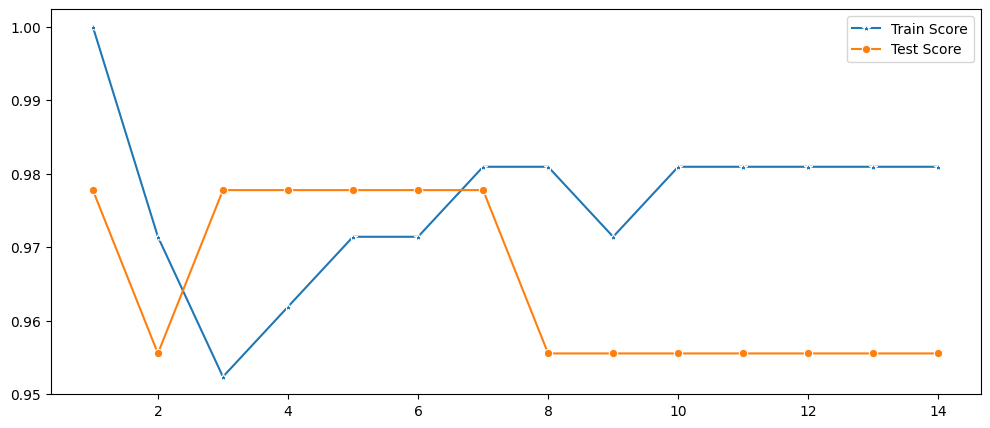

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plotting training scores
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')

# Plotting test scores
p = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')

plt.show()


In [ ]:
ACCURAY

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with n_neighbors = 11
knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Evaluate the classifier's performance on the test data
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Create a KNN classifier with n_neighbors = 11
knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Evaluate the classifier's performance on the test data
accuracy = knn.score(X_test, y_test)

print("Accuracy:", accuracy)


Accuracy: 1.0


This code is used to visualize the decision boundaries of a K-Nearest Neighbors (KNN) classifier on a test dataset

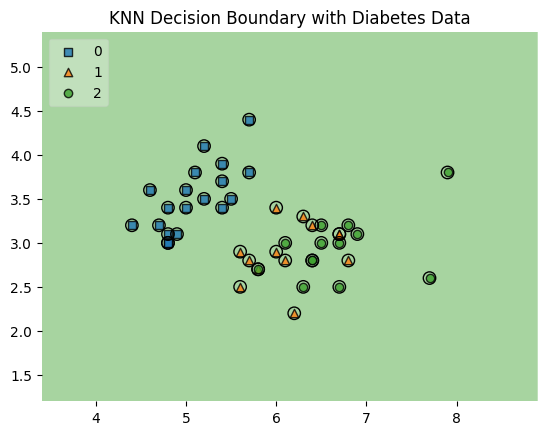

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Define value and width for filler features
value = 5
width = 5

# Plot decision regions
plot_decision_regions(X_test, y_test, clf=knn, legend=2,
                      filler_feature_values={0: value, 1: value, 2: value, 3: value},
                      filler_feature_ranges={0: width, 1: width, 2: width, 3: width},
                      X_highlight=X_test)

# Set title
plt.title('KNN Decision Boundary with Diabetes Data')

# Show plot
plt.show()


This code snippet helps visualize the performance of the KNN classifier by showing how well it predicts the labels compared to the actual labels, making it easier to understand the classification performance across different classes.

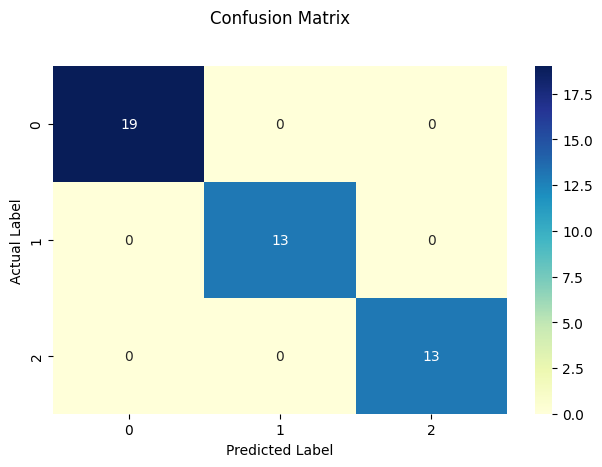

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

# Predict labels for test data
y_pred = knn.predict(X_test)

# Generate confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Set title, labels, and adjust layout
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_pred and y_test are defined earlier in your code

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Overall, this code snippet demonstrates how to evaluate the performance of a multiclass classification model using ROC curves and classification reports.







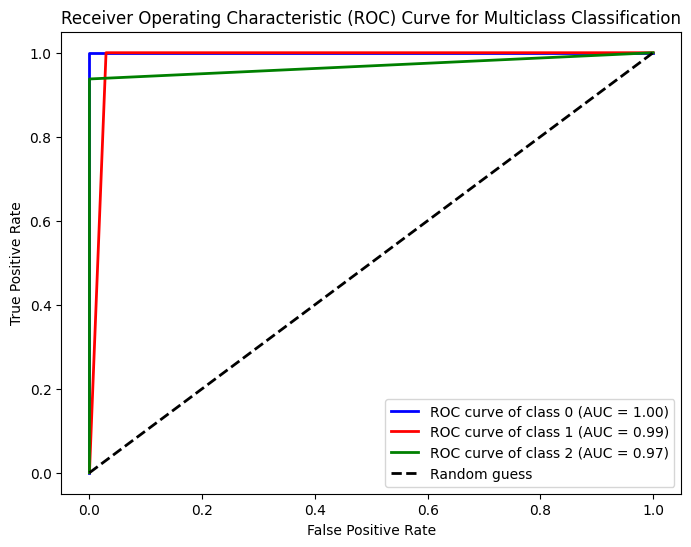

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

# Classification report
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
print("Shape of y_pred_proba:", y_pred_proba.shape)
print("Shape of y_test_binarized:", y_test_binarized.shape)


Shape of y_pred_proba: (45, 3)
Shape of y_test_binarized: (45, 3)


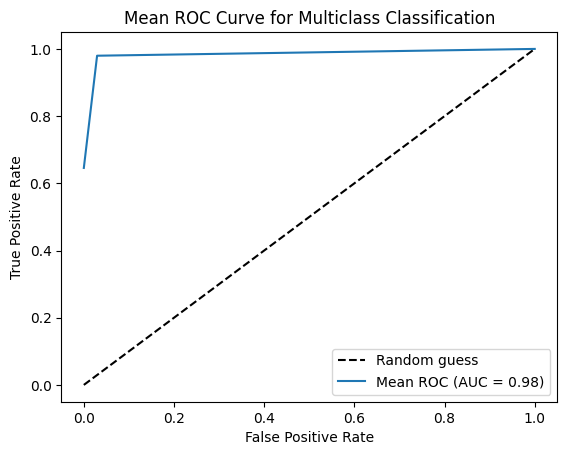

In [ ]:
import numpy as np

# Concatenate fpr and tpr values from all classes
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

# Compute mean ROC AUC
mean_auc = auc(all_fpr, mean_tpr)

# Plot the diagonal line representing random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

# Plot the mean ROC curve for all classes
plt.plot(all_fpr, mean_tpr, label='Mean ROC (AUC = {:.2f})'.format(mean_auc))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve for Multiclass Classification')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC AUC Score:", auc_score)


ROC AUC Score: 0.9846813725490197


In [ ]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score using one-vs-rest strategy
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", auc_score)

# Alternatively, you can use one-vs-one strategy
# auc_score_ovo = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
# print("ROC AUC Score (One-vs-One):", auc_score_ovo)


ROC AUC Score (One-vs-Rest): 0.9846813725490197


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Setup GridSearchCV
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_cv.fit(X, y)

# Print the best score and best parameters
print("Best Score:", knn_cv.best_score_)
print("Best Parameters:", knn_cv.best_params_)


Best Score: 0.9800000000000001
Best Parameters: {'n_neighbors': 6}


depolyment

In [ ]:
# Save the model with protocol version 4
joblib.dump(model, 'diabetic_retinopathy_model.keras', protocol=4)


['diabetic_retinopathy_model.keras']

testing

In [ ]:
# File: test_example.py

import pytest

# Example function to test
def add(a, b):
    return a + b

# Pytest function to test the add function
def test_add():
    assert add(1, 2) == 3
    assert add(-1, 1) == 0
    assert add(0, 0) == 0

# Another Pytest function to test the add function with floating-point numbers
def test_add_float():
    assert add(1.5, 2.5) == 4.0
    assert add(-1.5, 1.5) == 0.0

# Pytest function to test division by zero
def test_divide_by_zero():
    with pytest.raises(ZeroDivisionError):
        1 / 0

# Pytest function to test a failing assertion
def test_fail():
    assert add(2, 2) == 5

# Pytest function to test an expected failure
@pytest.mark.xfail
def test_expected_fail():
    assert add(2, 2) == 5

# Pytest function to test a parameterized test case
@pytest.mark.parametrize("a, b, expected", [(1, 2, 3), (0, 0, 0), (-1, 1, 0)])
def test_parametrized_add(a, b, expected):
    assert add(a, b) == expected


In [ ]:
from PIL import Image
import os

# Define the path to the directory containing the images
directory_path = '/content/test_images'

# List all files in the directory
file_names = os.listdir(directory_path)

# Choose the first image file (you can change this according to your requirement)
image_path = os.path.join(directory_path, file_names[0])

# Open the image
img = Image.open(image_path)

# Save the image with a new filename
img.save('saved_image.jpg')

print("Image saved successfully as 'saved_image.jpg'")


Image saved successfully as 'saved_image.jpg'


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('diabetic_retinopathy_model.keras')

# Define the path to the image you want to test
img_path = 'saved_image.jpg'

# Preprocess the input image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# Perform inference
predictions = model.predict(img_array)

# Post-process the output
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 288ms/step
Predicted class: 0


1/1 [==============================] - 0s 127ms/step


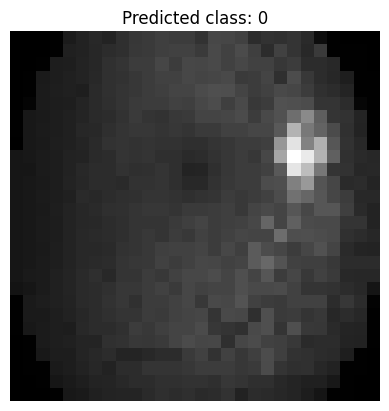

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = load_model('diabetic_retinopathy_model.keras')

# Define the path to the image you want to test
img_path = 'saved_image.jpg'

# Preprocess the input image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# Perform inference
predictions = model.predict(img_array)

# Post-process the output
predicted_class = np.argmax(predictions)

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('mnist_cnn_model.h5')

# Define a dictionary mapping class labels to images
class_to_image = {
    0: 'image_0_DR.jpg',
    1: 'image_1_DR.jpg',
    2: 'image_2_DR.jpg',
    3: 'image_3_DR.jpg',
    4: 'image_4_DR.jpg'
}

# Function to predict class label and display corresponding image
def predict_and_display_image(input_image_path):
    # Load and preprocess the input image
    # (Replace this with your own code to load and preprocess the input image)
    input_image = load_and_preprocess_image(input_image_path)

    # Predict the class label using the model
    predicted_class = model.predict_classes(input_image)[0]

    # Display the corresponding image
    image_path = class_to_image[predicted_class]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

# Function to load and preprocess the input image
def load_and_preprocess_image(image_path):
    # Implement this function based on your image loading and preprocessing requirements
    # For example, you can use libraries like PIL or OpenCV to load and preprocess the image
    pass

# Example usage:
input_image_path = 'input_image.jpg'
predict_and_display_image(input_image_path)


AttributeError: 'Sequential' object has no attribute 'predict_classes'

**DEPLOYMENT**

In [ ]:


!pip install flask-ngrok


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, World!"

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
